# MMDGraph

## What is this package for?

This package contains code to perform kernel two-sample hypothesis testing on samples of graphs. The code additionally allows for estimation of graphs from a real data matrix.


## How to install

<code> pip install MMDGraph </code>

## Usage

We will go thorugh multiple scenariros: The case when the user has it own networkx graphs, when they are estimated from data matricies, using different kernels and using different MMD estimators.

In [2]:
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import MMDGraph as mg

### Fit when H1 true, different edge probability

Start by creating sample graphs

In [3]:

n1 = n2 = 50
g1 = [nx.fast_gnp_random_graph(30,0.3) for _ in range(n1)]
g2 = [nx.fast_gnp_random_graph(30,0.4) for _ in range(n2)]
for j in range(len(g1)):
    nx.set_node_attributes(g1[j],  {key: str(value) for key, value in dict(g1[j].degree).items()} , 'label')
for j in range(len(g2)):
    nx.set_node_attributes(g2[j], {key: str(value) for key, value in dict(g2[j].degree).items()}, 'label')


Performd mmd test using various kernels

In [4]:
# Random Walk
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 6, c = 0.001)
print(f" RW_ARKU_plus {MMD_out.p_values}")

c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:560: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


 RW_ARKU_plus {'MMD_u': 0.0}


In [5]:
# RW kernel with labels, we just need to find the unique labels first
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'RW_ARKL', mmd_estimators = 'MMD_u', r = 4, c = 1e-3,node_label = 'label',
                                    unique_node_labels= set(np.concatenate([list(nx.get_node_attributes(g, 'label').values())for g in g1+g2])))
print(f" RW_ARKL {MMD_out.p_values}")


Using label as node labels
 RW_ARKL {'MMD_u': 0.0}


In [6]:
# GNTK kernel
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'GNTK', mmd_estimators = 'MMD_u', num_layers = 2, num_mlp_lauers = 2, jk = True, scale = 'uniform')
print(f" GNTK {MMD_out.p_values}")

100%|██████████| 5050/5050.0 [00:05<00:00, 919.40it/s] 


 GNTK {'MMD_u': 0.0}


In [7]:
# WWL kernel
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'WWL', mmd_estimators = 'MMD_u', discount = 0.1, h = 2, node_label = 'label')
print(f" WWL {MMD_out.p_values}")

Using label as node labels
 WWL {'MMD_u': 0.0}


In [8]:
# Deep Kernel without the deepness
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'DK', mmd_estimators = 'MMD_u', type = 'wl', wl_it = 4, node_label = 'label')
print(f" ML DK {MMD_out.p_values}")

Using label as node labels
 ML DK {'MMD_u': 0.0}


In [9]:

# Deep kernel with deepness, user has to install gensim, this might take some time, can try to increase number of workers
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'DK', mmd_estimators = 'MMD_u', type = 'wl', wl_it = 4, opt_type = 'word2vec', node_label = 'label', workers = 10)
print(f" Deep DK {MMD_out.p_values}")

Using label as node labels
 Deep DK {'MMD_u': 0.0}


In [10]:
# Grakel kernel example
kernel = [{"name": "weisfeiler_lehman", "n_iter": 1}, {"name": "vertex_histogram"}]
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = kernel, mmd_estimators = 'MMD_u', node_label = 'label')
print(f" WL {MMD_out.p_values}")

Using label as node labels
label
 WL {'MMD_u': 0.0}


In [11]:
# Grakel propagation
kernel = [ {"name":"propagation", 't_max':5, 'w':0.1, 'M':"TV"}]
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = kernel, mmd_estimators = 'MMD_u', node_label = 'label')
print(f" propagation {MMD_out.p_values}")


Using label as node labels
label


c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\grakel\kernels\propagation.py:212: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix[i] = (T.T / np.sum(T, axis=1)).T


KeyError: nan

### Using different MMD estimators

We can also use other MMD estimators

In [ ]:
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'RW_ARKU_plus', mmd_estimators = ['MMD_u', 'MMD_b', 'MMD_l', 'MONK_EST'], r = 2, c = 0.001, Q = 5)
print(f" RW_ARKU_plus {MMD_out.p_values}")

c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:935: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


 RW_ARKU_plus {'MMD_u': 0.0, 'MMD_b': 0.0, 'MMD_l': 0.0, 'MONK_EST': 0.0}


### H1 true different weights

In [ ]:
n1 = n2 = 50
g1_weights = [nx.fast_gnp_random_graph(30,0.3, seed = 42) for _ in range(n1)]
g2_weight = [nx.fast_gnp_random_graph(30,0.3, seed = 50) for _ in range(n2)]


for j in range(len(g1_weights)):
    nx.set_node_attributes(g1_weights[j],  {key: str(value) for key, value in dict(g1_weights[j].degree).items()} , 'label')
for j in range(len(g2_weight)):
    nx.set_node_attributes(g2_weight[j], {key: str(value) for key, value in dict(g2_weight[j].degree).items()}, 'label')


def edge_dist(loc, scale ):
    from scipy.stats import uniform
    return np.random.normal(loc = loc, scale = scale)# uniform.rvs(size=1,  loc = loc , scale = scale)[0]
def add_weight(G, loc, scale ):
    edge_w = dict()
    for e in G.edges():
        edge_w[e] = edge_dist(loc, scale)
    return edge_w


for G in g1_weights:
    nx.set_edge_attributes(G, add_weight(G, loc = 0.5, scale = 1), "weight")
for G in g2_weight:
    nx.set_edge_attributes(G, add_weight(G, loc = 0.5, scale = 4), "weight")


In [ ]:
# Random Walk
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_weights, G2 = g2_weight, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 2, c = 0.001, edge_attr = 'weight')
print(f" RW_ARKU_plus {MMD_out.p_values}")

Using weight as edge attributes


c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:935: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


 RW_ARKU_plus {'MMD_u': 0.0}


In [ ]:
# Random Walk weights ignored, should not reject
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_weights, G2 = g2_weight, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 2, c = 0.001, edge_attr = None)
print(f" propagation {MMD_out.p_values}")

 propagation {'MMD_u': 0.0}


In [ ]:
# Grakel pyramid
kernel = [{"name": "pyramid_match", "L": 6, "d":6, 'with_labels':False}]
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_weights, G2 = g2_weight, kernel = kernel, mmd_estimators = 'MMD_u', edge_attr = 'weight')
print(f" pyramid_match {MMD_out.p_values}")

Using weight as edge attributes
None
 pyramid_match {'MMD_u': 0.006}


In [ ]:
# propagation, needs node attribute or label 
kernel = [ {"name":"propagation", 't_max':5, 'w':0.01, 'M':"TV"}]
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_weights, G2 = g2_weight, kernel = kernel, mmd_estimators = 'MMD_u', edge_attr = 'weight', node_label = 'label')
print(f" propagation {MMD_out.p_values}")

Using weight as edge attributes
Using label as node labels
label
 propagation {'MMD_u': 0.0}


 ### H1 true different attributes

In [ ]:

n1 = n2 = 50
g1_attr = [nx.fast_gnp_random_graph(30,0.2,seed=42) for _ in range(n1)]
g2_attr = [nx.fast_gnp_random_graph(30,0.2,seed=50) for _ in range(n2)]
for j in range(len(g1_attr)):
    nx.set_node_attributes(g1_attr[j], dict( ( (i, np.random.normal(loc = 0, scale = 0.1, size = (1,))) for i in range(len(g1_attr[j])) ) ), 'attr')
for j in range(len(g2_attr)):
    nx.set_node_attributes(g2_attr[j], dict( ( (i, np.random.normal(loc = 0.1, scale = 0.1, size = (1,))) for i in range(len(g2_attr[j])) ) ), 'attr')


In [ ]:
# Random Walk with weights and node attributes
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_attr, G2 = g2_attr, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 4, c = 0.01, node_attr = 'attr')
print(f" RW_ARKU_plus {MMD_out.p_values}")

Using attr as node attributes
 RW_ARKU_plus {'MMD_u': 0.0}


In [ ]:
# GNTK with node attributes
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_attr, G2 = g2_attr, kernel = 'GNTK', mmd_estimators = 'MMD_u', num_layers = 2, num_mlp_lauers = 2, jk = True, scale = 'uniform', node_attr = 'attr')
print(f" GNTK {MMD_out.p_values}")

Using attr as node attributes


100%|██████████| 5050/5050.0 [00:03<00:00, 1284.80it/s]

 GNTK {'MMD_u': 0.0}


In [ ]:
# Grakel propagation
kernel = [ {"name":"propagation", 't_max':5, 'w':0.1, 'M':"L1",'with_attributes':True}]
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_attr, G2 = g2_attr, kernel = kernel, mmd_estimators = 'MMD_u', discount = 0.1, h = 2, node_attr = 'attr')
print(f" Propagation {MMD_out.p_values}")

Using attr as node attributes
attr
 Propagation {'MMD_u': 0.0}


### Different edge labels

The RW kernel can take different edge labels

In [ ]:
n1 = n2 = 50
g1_edge = [nx.fast_gnp_random_graph(30,0.2,seed=42) for _ in range(n1)]
g2_edge = [nx.fast_gnp_random_graph(30,0.2,seed=50) for _ in range(n2)]
for j in range(len(g1_edge)):
    nx.set_edge_attributes(g1_edge[j], {(i,k):np.random.choice(['a','b'], p = [0.6,0.4]) for i,k in g1_edge[j].edges }, 'edge_label')
for j in range(len(g2_edge)):
    nx.set_edge_attributes(g2_edge[j], {(i,k):np.random.choice(['a','b'], p = [0.7,0.3]) for i,k in g2_edge[j].edges }, 'edge_label')


for j in range(len(g1_edge)):
    nx.set_node_attributes(g1_edge[j], {i:np.random.choice(['a','b'], p = [0.6,0.4]) for i in range(g1_edge[j].number_of_nodes()) }, 'label')
for j in range(len(g2_edge)):
    nx.set_node_attributes(g2_edge[j], {i:np.random.choice(['a','b'], p = [0.7,0.3]) for i in range(g2_edge[j].number_of_nodes()) }, 'label')





In [ ]:
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_edge, G2 = g2_edge, kernel = 'RW_ARKU_edge', mmd_estimators = 'MMD_u', r = 4, c = 1e-3,edge_label = 'label',
                                    unique_edge_labels= ['a', 'b'])
print(f" RW_ARKU_edge {MMD_out.p_values}")


Using label as edge labels
 RW_ARKU_edge {'MMD_u': 0.0}


# Directed Graphs

The RW kernel can take directed graphs



In [ ]:
n1 = n2 = 50
g1_di = [nx.fast_gnp_random_graph(30,0.2,seed=42) for _ in range(n1)]
g2_di = [nx.fast_gnp_random_graph(30,0.2,seed=50) for _ in range(n2)]

for j in range(len(g1_di)):
    nx.set_node_attributes(g1_di[j], {i:np.random.choice(['a','b'], p = [0.6,0.4]) for i in range(g1_di[j].number_of_nodes()) }, 'label')
for j in range(len(g2_di)):
    nx.set_node_attributes(g2_di[j], {i:np.random.choice(['a','b'], p = [0.7,0.3]) for i in range(g2_di[j].number_of_nodes()) }, 'label')

for j in range(len(g1_di)):
    g1_di[j] = nx.DiGraph(g1_di[j])
for j in range(len(g2_di)):
    g2_di[j] = nx.DiGraph(g2_di[j])

for j in range(len(g1_di)):
    edges= list(g1_di[j].edges())
    for e,u in edges:
        if np.random.uniform() <0.3:
            g1_di[j].remove_edge(e,u)
for j in range(len(g2_di)):
    edges= list(g2_di[j].edges())
    for e,u in edges:
        if np.random.uniform() <0.4:
            g2_di[j].remove_edge(e,u)






In [ ]:
MMD_out = mg.MMD()
MMD_out.fit(G1 = g1_di, G2 = g2_di, kernel = 'RW_ARKU', mmd_estimators = 'MMD_u', r = 4, c = 1e-3)
print(f" RW_ARKU_edge {MMD_out.p_values}")


 RW_ARKU_edge {'MMD_u': 0.003}


### Two data matrices different structure
It is possible to estimate graphs from data matrices

In [ ]:
G = nx.fast_gnp_random_graph(11, 0.25, seed = 42)
assert nx.is_connected(G)

for e in G.edges():
    if np.random.uniform() <0.1:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = -w
    else:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = w

A = np.array(nx.adjacency_matrix(G).todense())
np.fill_diagonal(A, np.sum(np.abs(A), axis = 1)+0.1)

A_s = A.copy()
A_s[7,4] = 0
A_s[4,7] = 0
A_s[5,2] = 0
A_s[2,5] = 0


X1 = np.random.multivariate_normal(np.zeros(11),np.linalg.inv(A), size = 5000)
X2 = np.random.multivariate_normal(np.zeros(11),np.linalg.inv(A_s), size = 5000)

C:\Users\User\AppData\Local\Temp\ipykernel_32480\3751381554.py:12: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense())


In [ ]:
# window size = 200 so 5000/200 = 25 graphs in each sample
# Random Walk
MMD_out = mg.MMD()
MMD_out.estimate_graphs(X1,X2,window_size=200, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False)
MMD_out.fit( kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 5, c = 0.1, edge_attr = 'weight')
print(MMD_out.p_values)



Using weight as edge attributes


c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:935: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


{'MMD_u': 0.0}


In [ ]:
# We can set node labels as degree (or define our own labelling, see below)
MMD_out = mg.MMD()
kernel = [{"name": "weisfeiler_lehman", "n_iter": 2}, {"name": "vertex_histogram"}]
MMD_out.estimate_graphs(X1,X2,window_size=400, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False, set_labels="degree")
MMD_out.fit( kernel = kernel, mmd_estimators = 'MMD_u',  edge_attr = 'weight')
print(MMD_out.p_values)

Using weight as edge attributes
Using label as node labels
label
{'MMD_u': 0.015}


Text(0.5, 1.0, 'One estimated precision structure from sample 2')

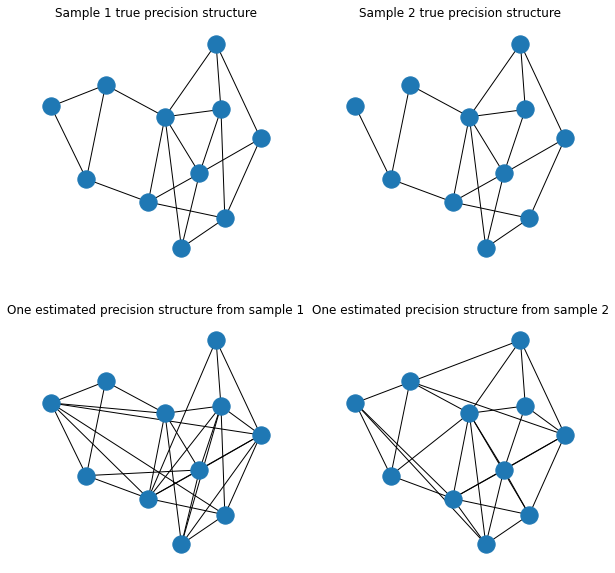

In [ ]:
np.fill_diagonal(A_s,0)
fig, ax = plt.subplots(2,2,figsize = (10,10))
pos = nx.kamada_kawai_layout(G, weight = None)
nx.draw(G, pos = pos, ax = ax[0,0])
nx.draw(nx.from_numpy_array(A_s), pos = pos, ax = ax[0,1])
nx.draw(MMD_out.G1[3], pos = pos, ax = ax[1,0])
nx.draw(MMD_out.G2[3], pos = pos, ax = ax[1,1])
ax[0,0].set_title("Sample 1 true precision structure")
ax[0,1].set_title("Sample 2 true precision structure")
ax[1,0].set_title("One estimated precision structure from sample 1")
ax[1,1].set_title("One estimated precision structure from sample 2")

### Two data matrices same structure different attributes
It is possible to estimate the graphs beforehand and apply a function to get node attributes

In [ ]:
G = nx.fast_gnp_random_graph(11, 0.25, seed = 42)
assert nx.is_connected(G)

for e in G.edges():
    if np.random.uniform() <0.1:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = -w
    else:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = w

A = np.array(nx.adjacency_matrix(G).todense())
np.fill_diagonal(A, np.sum(np.abs(A), axis = 1)+0.1)


X1 = np.random.multivariate_normal(np.zeros(11),np.linalg.inv(A), size = 10000)
X2 = np.random.multivariate_normal(np.ones(11),np.linalg.inv(A), size = 10000)

C:\Users\User\AppData\Local\Temp\ipykernel_32480\3274406453.py:12: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense())


In [ ]:
# Random Walk, with attributes, should reject. , the class will use the node label name 'attr'
def attr_function(X):
    return np.expand_dims(np.mean(X,axis = 0),axis=1)

MMD_out = mg.MMD()
MMD_out.estimate_graphs(X1,X2,window_size=400, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False, set_attributes = attr_function)
MMD_out.fit( kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 5, c = 0.1, edge_attr = 'weight', node_attr = 'attr')
print(MMD_out.p_values)

Using weight as edge attributes
Using attr as node attributes


c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:935: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


{'MMD_u': 0.0}


In [ ]:
# If we do not give attributes in this case the test should not reject
MMD_out_no_attr = mg.MMD()
MMD_out_no_attr.fit(G1= MMD_out.G1, G2 = MMD_out.G2, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 5, c = 0.1, edge_attr = 'weight')
print(MMD_out_no_attr.p_values)

Using weight as edge attributes
{'MMD_u': 0.515}


In [ ]:
# We can also try to make a label function, has to be a dictionary, the class will use the node label name 'label'
def label_function(X):
    m = np.mean(X,axis = 0)
    return {i:str(np.round(m[i],1)) for i in range(len(m))}

kernel = [{"name": "weisfeiler_lehman", "n_iter": 2}, {"name": "vertex_histogram"}]
MMD_out = mg.MMD()
MMD_out.estimate_graphs(X1,X2,window_size=400, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False, set_labels= label_function)
MMD_out.fit(kernel = kernel, mmd_estimators = 'MMD_u', node_label = 'label')
print(MMD_out.p_values)

Using label as node labels
label
{'MMD_u': 0.0}


In [ ]:
# We can also define labels using a dict
label_dict = {'1':{j:i for j,i in enumerate(['a']*6 + ['b']*5)}, 
              '2':{j:i for j,i in enumerate(['a']*4 + ['b']*7)}}
kernel = [{"name": "weisfeiler_lehman", "n_iter": 2}, {"name": "vertex_histogram"}]
MMD_out = mg.MMD()
MMD_out.estimate_graphs(X1,X2,window_size=400, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False, set_labels= label_dict)
MMD_out.fit(kernel = kernel, mmd_estimators = 'MMD_u', node_label = 'label')
print(MMD_out.p_values)

Using label as node labels
label
{'MMD_u': 0.0}
